# import all depedencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pyeeg
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
%matplotlib inline


# Load files from folders 

In [2]:
# import each and every file

dirA = "set_a_z/Z/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)    # class: 1     val:

dirB = "set_b_o/O/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)    # class: 1     val:  -1

dirC = "set_c_n/N/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)   # class:2       val: 0


dirD = "set_d_f/F/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)    # class: 1     val:


dirE = "set_e_s/S/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)  # class: 3        val: 1


# create small tables 

In [3]:
ta = []
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i], header=None)
    x.columns = [st+str(i)]
    ta.append(x)

tb = []
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i], header=None)
    x.columns = [st+str(i)]
    tb.append(x)

tc = []
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i], header=None)
    x.columns = [st+str(i)]
    tc.append(x)

td = []
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i], header=None)
    x.columns = [st+str(i)]
    td.append(x)

te = []
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i], header=None)
    x.columns = [st+str(i)]
    te.append(x)


# make big table

In [4]:
def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta], axis=1)
    return big_table


In [5]:

bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)
head = list(bigB.columns.values)


In [6]:
bigB


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,...,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,...,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,...,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,...,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,...,-14,-152,-93,187,10,-127,-30,43,-99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21,-93,70,98,-23,18,-31,92,-108,-110,...,-33,-20,-3,-21,94,-90,-9,98,-55,91
4093,23,-95,49,86,-36,17,-33,76,-83,-118,...,-39,-45,-5,-10,80,-90,-24,77,-67,89
4094,22,-84,37,76,-43,36,-37,59,-45,-103,...,-34,-79,-27,0,53,-86,-34,65,-62,52
4095,9,-60,20,57,-44,58,-44,39,0,-77,...,-24,-95,-50,-12,39,-88,-32,47,-43,-4


In [7]:
len(bigB.columns)


100

# creat sub matrix for each

In [8]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat), (len(head))))
    for i in range(len(head)):
        matx[:, i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1


In [9]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)  # : refers to healthy data
# : refers to Inter-ictal (transition between healthy to seizure)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE)  # : of ictal or seizures

matA = np.nan_to_num(matA)
# matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)


# 4097 data point per channel
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec
# the raw data from one of the channels for the 23.59 sec


#  <---------  create number of featuters ------------>

# 7- Features

# (DFA,HFD,SVD_Entropy,Fisher_Information,ApEn,PFD,Spectral_Entropy)

In [10]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def features(mat):
    Kmax = 5
    Tau = 4
    DE = 10
    M = 10
    R = 0.3
    Band = np.arange(1, 86)
    Fs = 173
    DFA = pyeeg.dfa(mat)
    HFD = pyeeg.hfd(mat, Kmax)
    SVD_Entropy = pyeeg.svd_entropy(mat, Tau, DE)
    Fisher_Information = pyeeg.fisher_info(mat, Tau, DE)
    # ApEn               = pyeeg.ap_entropy(mat, M, R)      # very slow
    PFD = pyeeg.pfd(mat)
    # Spectral_Entropy   = pyeeg.spectral_entropy(mat, Band, Fs, Power_Ratio=None)
    sleep(0.01)

    # return (DFA,HFD,SVD_Entropy,Fisher_Information,PFD,Spectral_Entropy)
    return (DFA, HFD, SVD_Entropy, Fisher_Information, PFD)


# Compute the features of datasets

In [11]:
# this is three classification proble
# class1: healthy
# class2: transition
# class3: dieases


In [12]:
# create features of class I
f1_A = np.zeros((100, 1))
f2_A = np.zeros((100, 1))
f3_A = np.zeros((100, 1))
f4_A = np.zeros((100, 1))
f5_A = np.zeros((100, 1))
# f6_B    = np.zeros((100,1))
cl_A = np.zeros((100, 1))  # 0


for i in range(100):
    # [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0],f6_B[i,0]]=features(matB[:,i])
    [f1_A[i, 0], f2_A[i, 0], f3_A[i, 0], f4_A[i, 0],
        f5_A[i, 0]] = features(matA[:, i])


/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensio

In [13]:
# create features of class I
f1_B = np.zeros((100, 1))
f2_B = np.zeros((100, 1))
f3_B = np.zeros((100, 1))
f4_B = np.zeros((100, 1))
f5_B = np.zeros((100, 1))
# f6_B    = np.zeros((100,1))
cl_B = np.ones((100, 1))  # 1


for i in range(100):
    # [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0],f6_B[i,0]]=features(matB[:,i])
    [f1_B[i, 0], f2_B[i, 0], f3_B[i, 0], f4_B[i, 0],
        f5_B[i, 0]] = features(matB[:, i])


In [14]:
pd.DataFrame(matB)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-24.0,-55.0,-36.0,-14.0,-58.0,87.0,-52.0,2.0,8.0,-53.0,...,62.0,-128.0,-83.0,98.0,-53.0,29.0,-76.0,27.0,-6.0,-18.0
1,-22.0,-48.0,-40.0,-5.0,-78.0,98.0,-56.0,-6.0,0.0,-15.0,...,49.0,-158.0,-120.0,178.0,-33.0,10.0,-102.0,4.0,-19.0,-13.0
2,-17.0,-48.0,-36.0,0.0,-83.0,103.0,-49.0,-22.0,-16.0,11.0,...,14.0,-161.0,-123.0,236.0,-23.0,-26.0,-95.0,1.0,-47.0,0.0
3,-18.0,-38.0,-35.0,7.0,-69.0,108.0,-51.0,-17.0,-38.0,38.0,...,-14.0,-158.0,-119.0,237.0,0.0,-81.0,-65.0,19.0,-83.0,9.0
4,-19.0,-23.0,-22.0,7.0,-31.0,97.0,-53.0,6.0,-31.0,35.0,...,-14.0,-152.0,-93.0,187.0,10.0,-127.0,-30.0,43.0,-99.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21.0,-93.0,70.0,98.0,-23.0,18.0,-31.0,92.0,-108.0,-110.0,...,-33.0,-20.0,-3.0,-21.0,94.0,-90.0,-9.0,98.0,-55.0,91.0
4093,23.0,-95.0,49.0,86.0,-36.0,17.0,-33.0,76.0,-83.0,-118.0,...,-39.0,-45.0,-5.0,-10.0,80.0,-90.0,-24.0,77.0,-67.0,89.0
4094,22.0,-84.0,37.0,76.0,-43.0,36.0,-37.0,59.0,-45.0,-103.0,...,-34.0,-79.0,-27.0,0.0,53.0,-86.0,-34.0,65.0,-62.0,52.0
4095,9.0,-60.0,20.0,57.0,-44.0,58.0,-44.0,39.0,0.0,-77.0,...,-24.0,-95.0,-50.0,-12.0,39.0,-88.0,-32.0,47.0,-43.0,-4.0


In [15]:
# create features of class II
f1_C = np.zeros((100, 1))
f2_C = np.zeros((100, 1))
f3_C = np.zeros((100, 1))
f4_C = np.zeros((100, 1))
f5_C = np.zeros((100, 1))
# f6_C    = np.zeros((100,1))
cl_C = np.ones((100, 1))*2  # transition means 2

for i in range(100):
    # [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0],f6_C[i,0]]=features(matC[:,i])
    [f1_C[i, 0], f2_C[i, 0], f3_C[i, 0], f4_C[i, 0],
        f5_C[i, 0]] = features(matC[:, i])


/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:125: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/detrended_fluctuation_analysis.py:129: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/lib/python3.10/site-packages/pyeeg-0.4.4-py3.10.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensio

In [16]:
# create features of class II
f1_D = np.zeros((100, 1))
f2_D = np.zeros((100, 1))
f3_D = np.zeros((100, 1))
f4_D = np.zeros((100, 1))
f5_D = np.zeros((100, 1))
# f6_C    = np.zeros((100,1))
cl_D = np.ones((100, 1))*3  # transition means 3

for i in range(100):
    # [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0],f6_C[i,0]]=features(matC[:,i])
    [f1_D[i, 0], f2_D[i, 0], f3_D[i, 0], f4_D[i, 0],
        f5_D[i, 0]] = features(matD[:, i])


In [17]:
# create features of class III
f1_E = np.zeros((100, 1))
f2_E = np.zeros((100, 1))
f3_E = np.zeros((100, 1))
f4_E = np.zeros((100, 1))
f5_E = np.zeros((100, 1))
# f6_E    = np.zeros((100,1))
# cl_E    = np.negative(np.ones((100,1))) # -1
cl_E = np.ones((100, 1))*4

for i in range(100):
    # [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0],f6_E[i,0]]=features(matE[:,i])
    [f1_E[i, 0], f2_E[i, 0], f3_E[i, 0], f4_E[i, 0],
        f5_E[i, 0]] = features(matE[:, i])


# create Feature and class matrix for each Classes

In [18]:
# MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B,f6_B,cl_B],axis=1)
# MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C,f6_C,cl_C],axis=1)
# MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E,f6_E,cl_E],axis=1)

MftA = np.concatenate([f1_A, f2_A, f3_A, f4_A, f5_A, cl_A], axis=1)
MftB = np.concatenate([f1_B, f2_B, f3_B, f4_B, f5_B, cl_B], axis=1)
MftC = np.concatenate([f1_C, f2_C, f3_C, f4_C, f5_C, cl_C], axis=1)
MftD = np.concatenate([f1_D, f2_D, f3_D, f4_D, f5_D, cl_D], axis=1)
MftE = np.concatenate([f1_E, f2_E, f3_E, f4_E, f5_E, cl_E], axis=1)


In [19]:
np.min(MftA)

0.0

In [20]:
pd.DataFrame(MftE)


,0,1,2,3,4,5
0,0.452923,0.121304,2.301257,2.301257,0.601985,4.0
1,0.558011,0.156855,2.301265,2.301265,0.594337,4.0
2,0.380397,0.162792,2.301263,2.301263,0.594629,4.0
3,0.205122,0.084496,2.301268,2.301268,0.603363,4.0
4,0.437735,0.080453,2.301269,2.301269,0.605803,4.0
...,...,...,...,...,...,...
95,0.424106,0.092797,2.301373,2.301373,0.604564,4.0
96,0.101266,0.053133,2.301376,2.301376,0.637104,4.0
97,0.121906,0.089653,2.301379,2.301379,0.606438,4.0
98,0.341561,0.126592,2.301372,2.301372,0.600381,4.0


In [21]:
# FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','f6','class'])
# FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','f6','class'])
# FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','f6','class'])
FCM_A = pd.DataFrame(MftA, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])
FCM_B = pd.DataFrame(MftB, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])
FCM_C = pd.DataFrame(MftC, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])
FCM_D = pd.DataFrame(MftD, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])
FCM_E = pd.DataFrame(MftE, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])

FCM_B.head(4)


,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,1.0


In [22]:
# TotalDataset = pd.concat([FCM_B,FCM_C,FCM_E],ignore_index=False)
TotalDataset = pd.concat(
    [FCM_A, FCM_B, FCM_C, FCM_D, FCM_E], ignore_index=False)

TotalDataset[200:300]


,f1,f2,f3,f4,f5,class
0,0.770598,0.103797,2.292263,2.292263,0.598450,2.0
1,0.832769,0.120673,2.292271,2.292271,0.592081,2.0
2,0.840151,0.168617,2.292268,2.292268,0.583278,2.0
3,0.966122,0.181981,2.292276,2.292276,0.580750,2.0
4,0.899182,0.248858,2.292274,2.292274,0.572353,2.0
...,...,...,...,...,...,...
95,0.905390,0.261013,2.292173,2.292173,0.572227,2.0
96,0.841522,0.220479,2.292173,2.292173,0.578577,2.0
97,0.686631,0.236055,2.292170,2.292170,0.572102,2.0
98,1.017250,0.098454,2.292173,2.292173,0.600381,2.0


In [23]:
# -


In [24]:
TotalDataset['class'].unique()


array([0., 1., 2., 3., 4.])

In [25]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # One-hot encoding
# onehotencoder = OneHotEncoder()
# onehot_data = onehotencoder.fit_transform(TotalDataset[['class']]).toarray()

# # Label encoding
# labelencoder = LabelEncoder()
# label_data = labelencoder.fit_transform(TotalDataset[['class']])


In [26]:
# label_data


In [27]:
TotalDataset


,f1,f2,f3,f4,f5,class
0,0.814505,0.186563,2.296296,2.296296,0.586510,0.0
1,0.756747,0.193701,2.296296,2.296296,0.582345,0.0
2,0.831189,0.176454,2.296315,2.296315,0.588242,0.0
3,0.766903,0.304344,2.296310,2.296310,0.568653,0.0
4,0.911118,0.221629,2.296306,2.296306,0.576495,0.0
...,...,...,...,...,...,...
95,0.424106,0.092797,2.301373,2.301373,0.604564,4.0
96,0.101266,0.053133,2.301376,2.301376,0.637104,4.0
97,0.121906,0.089653,2.301379,2.301379,0.606438,4.0
98,0.341561,0.126592,2.301372,2.301372,0.600381,4.0


In [28]:
TotalDataset[TotalDataset['class'] == 0.0]


,f1,f2,f3,f4,f5,class
0,0.814505,0.186563,2.296296,2.296296,0.586510,0.0
1,0.756747,0.193701,2.296296,2.296296,0.582345,0.0
2,0.831189,0.176454,2.296315,2.296315,0.588242,0.0
3,0.766903,0.304344,2.296310,2.296310,0.568653,0.0
4,0.911118,0.221629,2.296306,2.296306,0.576495,0.0
...,...,...,...,...,...,...
95,0.759436,0.190710,2.296277,2.296277,0.585859,0.0
96,0.874685,0.206101,2.296270,2.296270,0.583536,0.0
97,0.979616,0.192117,2.296274,2.296274,0.582012,0.0
98,0.732907,0.232545,2.296282,2.296282,0.583710,0.0


In [29]:
# TotalDataset[TotalDataset['class']==4.0].
# concat((TotalDataset[TotalDataset['class']==0.0]).sample(frac=0.25)).
# concat((TotalDataset[TotalDataset['class']==1.0]).sample(frac=0.25)).
# concat((TotalDataset[TotalDataset['class']==2.0]).sample(frac=0.25)).
# concat((TotalDataset[TotalDataset['class']==3.0]).sample(frac=0.25))

TotalDataset = pd.concat([TotalDataset[TotalDataset['class'] == 4.0],
                          TotalDataset[TotalDataset['class']
                                       == 0.0].sample(frac=0.25),
                          TotalDataset[TotalDataset['class']
                                       == 1.0].sample(frac=0.25),
                          TotalDataset[TotalDataset['class']
                                       == 2.0].sample(frac=0.25),
                          TotalDataset[TotalDataset['class']
                                        == 3.0].sample(frac=0.25)])


In [30]:
TotalDataset.loc[TotalDataset['class'] == 1.0, 'class'] = 0
TotalDataset.loc[TotalDataset['class'] == 2.0, 'class'] = 0
TotalDataset.loc[TotalDataset['class'] == 3.0, 'class'] = 0
TotalDataset.loc[TotalDataset['class'] == 4.0, 'class'] = 1


In [31]:
TotalDataset['class'].unique()


array([1., 0.])

In [32]:
TotalDataset


,f1,f2,f3,f4,f5,class
0,0.452923,0.121304,2.301257,2.301257,0.601985,1.0
1,0.558011,0.156855,2.301265,2.301265,0.594337,1.0
2,0.380397,0.162792,2.301263,2.301263,0.594629,1.0
3,0.205122,0.084496,2.301268,2.301268,0.603363,1.0
4,0.437735,0.080453,2.301269,2.301269,0.605803,1.0
...,...,...,...,...,...,...
76,0.744804,0.232481,2.299571,2.299571,0.572416,0.0
42,0.680428,0.110088,2.299569,2.299569,0.587801,0.0
23,0.683005,0.206011,2.299548,2.299548,0.576744,0.0
82,0.814650,0.192100,2.299568,2.299568,0.579958,0.0


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One-hot encoding
onehotencoder = OneHotEncoder()
onehot_data = onehotencoder.fit_transform(TotalDataset[['class']]).toarray()

# Label encoding
labelencoder = LabelEncoder()
label_data = labelencoder.fit_transform(TotalDataset[['class']])


/usr/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Split arrays or matrices into random train and test subsets

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
# X = TotalDataset[['f1','f2','f3','f4','f5','f6']]
X = TotalDataset[['f1', 'f2', 'f3', 'f4', 'f5']]
# y = TotalDataset[['class']]
y = label_data
X = np.asarray(X)
y = np.asarray(y)


In [36]:
len(TotalDataset),


(200,)

In [37]:
train_ratio = 0.8
# val_ratio = 0.15
test_ratio = 0.2

# Split the data into training, validation, and testing sets for A
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, shuffle=True, random_state=42)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [38]:
X.shape, X_train.shape,  X_test.shape  # ,X_val.shape,


((200, 5), (160, 5), (40, 5))

In [39]:
y_train, y_test


(array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]))

# apply machine learning 

In [40]:
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, RocCurveDisplay

import seaborn as sn


In [41]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150


In [42]:
names = ["K Nearest Neighbors", 
         "RBF SVM",
         "Decision Tree",
           "Random Forest",
            #  "Neural Net",
         "Naive Bayes",
           "Logistic Regression",
             "SGD"]
# "Linear SVM" "Gaussian Process", , "QDA", "AdaBoost",


In [43]:
classifiers = [
    KNeighborsClassifier(1),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    LogisticRegression(),
    SGDClassifier(loss="log_loss", penalty="l2", max_iter=30, learning_rate='optimal')]


/usr/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


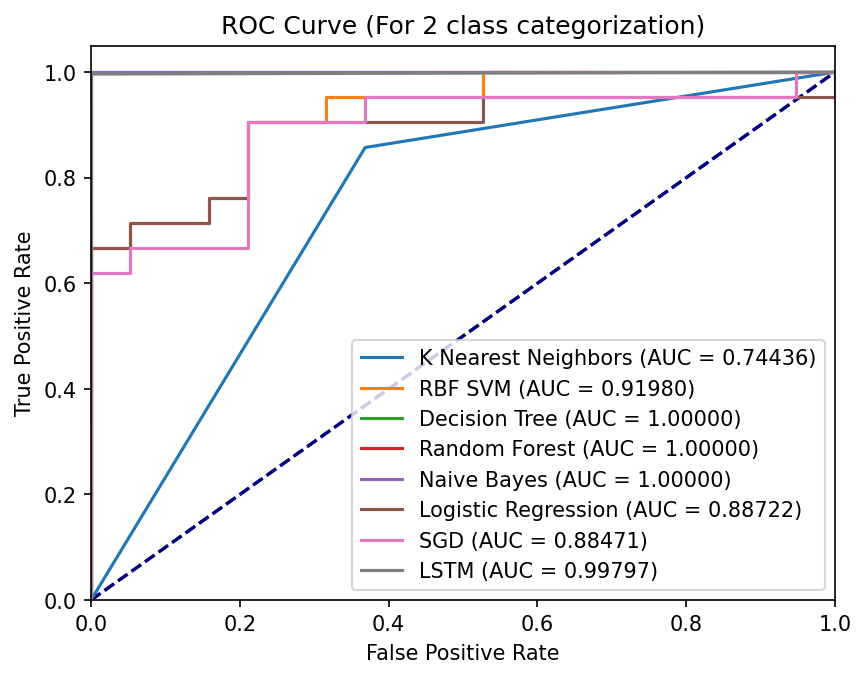

In [44]:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

clf_score = []
tst_acc = []
epileptic_no = []
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

conf_matrices = []
y_pred_list = []

# Convert y_test to one-hot encoding
n_classes = 2  # len(np.unique(y))
# y_test_onehot = label_binarize(y_test, classes=np.arange(n_classes))onehotencoder = OneHotEncoder()
# onehotencoder = OneHotEncoder()
# y_test_onehot = onehotencoder.fit_transform(y_test).toarray()


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for name, clf in zip(names, classifiers):

        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        scores = cross_val_score(
            clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        clf.fit(X_train, y_train)
        # clf.fit(X_train, y_train)
        # score = clf.score(X_test, y_test)
        clf_score.append([mean(scores), name])
        y_hat = clf.predict(X_test)
        y_pred_list.append(y_hat.copy())
        tst_acc.append([accuracy_score(y_test, y_hat), name])
        c_m = confusion_matrix(y_test, y_hat, labels=np.unique(y))
        conf_matrices.append(c_m)

        y_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (AUC = %0.5f)' % (name, roc_auc))

yo1 = np.load('yo1_binary.npy', allow_pickle = True)
yp1 = np.load('yp1_binary.npy', allow_pickle = True)
c_m = confusion_matrix(y_test, y_hat, labels=np.unique(y))
# conf_matrices.append(c_m)
# y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yo1, yp1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s (AUC = %0.5f)' % ('LSTM', roc_auc))
# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (For 2 class categorization)')
plt.legend(loc="lower right")
plt.show()


In [45]:
import os
os.getcwd()

'/home/satya/ACAD/NEURO'

In [46]:
clf_score


[[0.8, 'K Nearest Neighbors'],
 [0.84375, 'RBF SVM'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [0.99375, 'Naive Bayes'],
 [0.825, 'Logistic Regression'],
 [0.76875, 'SGD']]

In [47]:
# The accuracy is taken from Product_Final.ipynb file results 
tst_acc.append([0.9990, 'LSTM'])
tst_acc

[[0.75, 'K Nearest Neighbors'],
 [0.825, 'RBF SVM'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [1.0, 'Naive Bayes'],
 [0.85, 'Logistic Regression'],
 [0.725, 'SGD'],
 [0.999, 'LSTM']]

In [48]:
tst_acc

[[0.75, 'K Nearest Neighbors'],
 [0.825, 'RBF SVM'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [1.0, 'Naive Bayes'],
 [0.85, 'Logistic Regression'],
 [0.725, 'SGD'],
 [0.999, 'LSTM']]

In [49]:
li = ['KNN', 'SVM', 'DT', 'RF','NB', 'LR', 'SGD', 'LSTM']

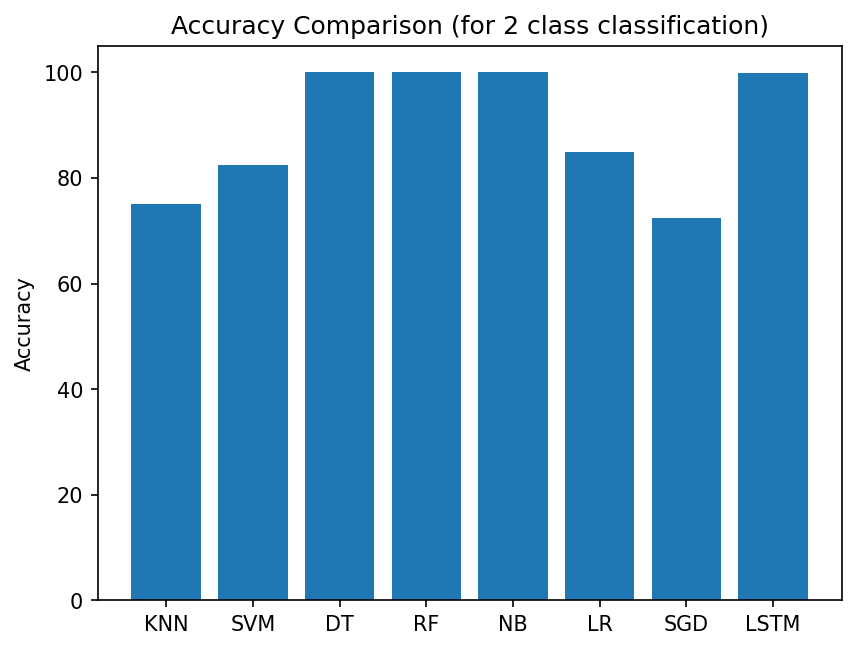

In [50]:
x = np.array([i for i in li])
y = np.array([i[0]*100 for i in tst_acc])

plt.bar(x, y)
plt.title('Accuracy Comparison (for 2 class classification)')
# plt.x
plt.ylabel('Accuracy')
plt.show()


In [51]:
conf_matrices.append(c_m)

In [52]:
conf_matrices

[array([[12,  7],
        [ 3, 18]]),
 array([[15,  4],
        [ 3, 18]]),
 array([[19,  0],
        [ 0, 21]]),
 array([[19,  0],
        [ 0, 21]]),
 array([[19,  0],
        [ 0, 21]]),
 array([[15,  4],
        [ 2, 19]]),
 array([[19,  0],
        [11, 10]]),
 array([[19,  0],
        [11, 10]])]

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

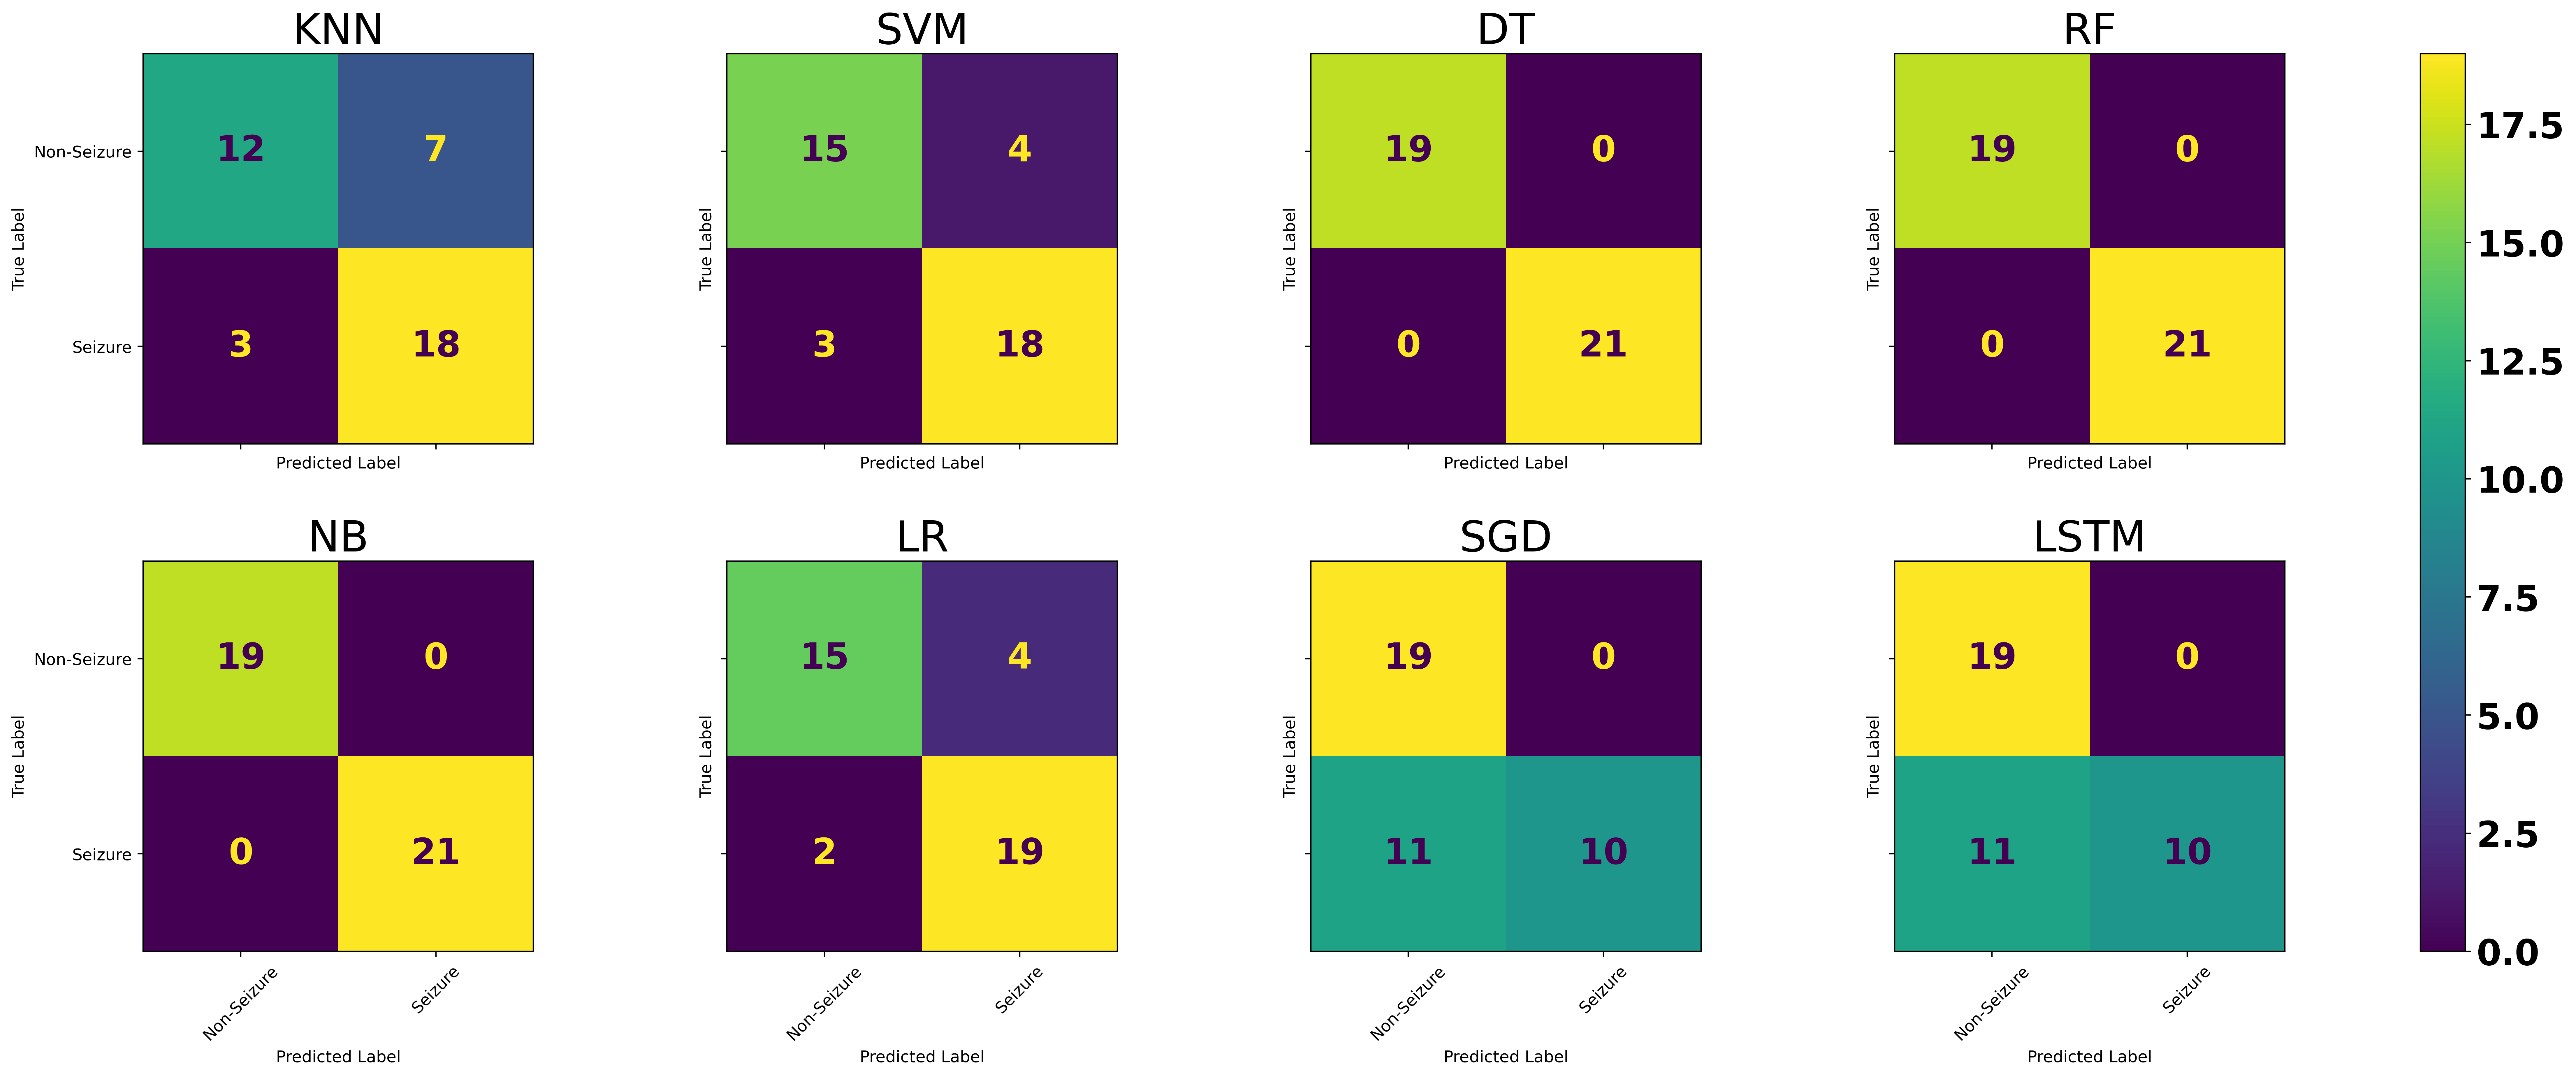

In [54]:
count = 0 
labels = ['Non-Seizure','Seizure']
fig, axs = plt.subplots(2, 4, figsize=(30,10), sharey='row', sharex='col'

                        # , constrained_layout = True
                        )
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
for i in range(2):
    for j in range(4):
        disp = ConfusionMatrixDisplay(conf_matrices[count], display_labels=labels)
        disp.plot(ax=axs[i,j], xticks_rotation=45)
        disp.ax_.set_title(li[count])
        disp.ax_.set_xlabel('Predicted Label')
        disp.ax_.set_ylabel('True Label')
        disp.im_.colorbar.remove()
        
        # if i!=0:
        #     disp.ax_.set_ylabel('')
        count += 1
# fig.text(0.4, -0.1, 'Predicted label', ha='left')
# fig.supylabel('True Label')
plt.subplots_adjust(wspace=0.40, hspace=0.3)
fig.colorbar(disp.im_, ax=axs)
fig.set_dpi(400)

plt.show()

In [55]:
# for name, conf_mat in zip(names, conf_matrices):
#     df_cm = pd.DataFrame(conf_mat, index=[i for i in "01"],
#                          columns=[i for i in "01"])
#     print(conf_mat)
#     plt.figure(figsize=(10, 7))
#     plt.title(f'{name} (Confusion Matrix For 2 class categorization)')
#     # colormap = plt.cm.cubehelix_r
#     sn.heatmap(df_cm, annot=True, cmap='magma_r')

#     # plt.show()

# plt.show()


In [57]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3,
                           n_clusters_per_class=2, n_classes=3, random_state=1)


In [58]:
from sklearn.metrics import precision_recall_fscore_support

In [59]:
for i in range(len(names)):
    print(f'{names[i]}\t:{precision_recall_fscore_support(y_test, np.rint(y_pred_list[i]),average="binary")}')
print(f'LSTM\t:{precision_recall_fscore_support(yo1, np.rint(yp1),average="binary")}')

K Nearest Neighbors	:(0.72, 0.8571428571428571, 0.782608695652174, None)
RBF SVM	:(0.8181818181818182, 0.8571428571428571, 0.8372093023255814, None)
Decision Tree	:(1.0, 1.0, 1.0, None)
Random Forest	:(1.0, 1.0, 1.0, None)
Naive Bayes	:(1.0, 1.0, 1.0, None)
Logistic Regression	:(0.8260869565217391, 0.9047619047619048, 0.8636363636363636, None)
SGD	:(1.0, 0.47619047619047616, 0.6451612903225806, None)
LSTM	:(0.9989136338946225, 0.9962080173347779, 0.9975589910496339, None)


In [60]:
# test accuracy
tst_acc

[[0.75, 'K Nearest Neighbors'],
 [0.825, 'RBF SVM'],
 [1.0, 'Decision Tree'],
 [1.0, 'Random Forest'],
 [1.0, 'Naive Bayes'],
 [0.85, 'Logistic Regression'],
 [0.725, 'SGD'],
 [0.999, 'LSTM']]